# 📊 Clustering Dokumen Email Spam
UTS - Analisis Teks dan Clustering Email Spam

Langkah-langkah:
1. Preprocessing teks
2. TF-IDF Vectorization
3. Clustering dengan K-Means
4. Visualisasi dan interpretasi hasil

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import re, string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load dataset
df = pd.read_csv('datasets/spam.csv', encoding='latin1')
df = df[['Text']].dropna()
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\willy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text
0  Go until jurong point, crazy.. Available only ...
1                      Ok lar... Joking wif u oni...
2  Free entry in 2 a wkly comp to win FA Cup fina...
3  U dun say so early hor... U c already then say...
4  Nah I don't think he goes to usf, he lives aro...

## 🔧 Preprocessing Teks

In [2]:
# Fungsi preprocessing teks
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens)

# Terapkan ke seluruh data
df['clean_text'] = df['Text'].apply(clean_text)
df.head()

Text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                          clean_text  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4             nah think goes usf lives around though

## 🔠 TF-IDF Vectorization

In [3]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clean_text'])
X.shape

(5572, 1000)

## 🔍 Menentukan Jumlah Cluster Optimal (Elbow + Silhouette)

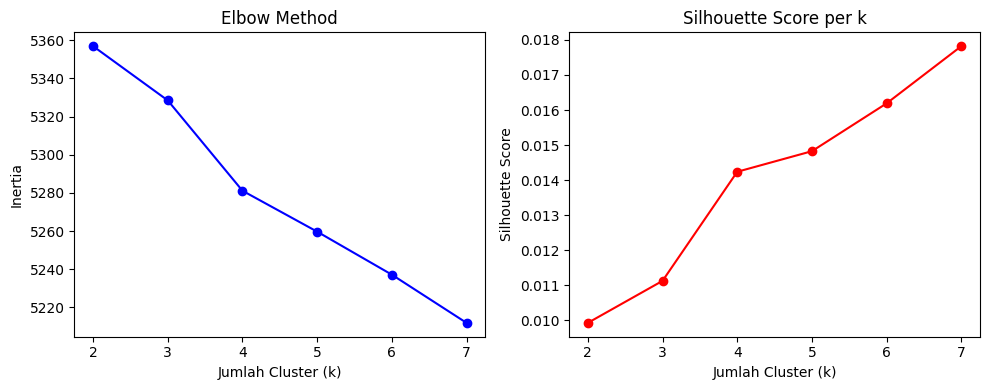

In [4]:
inertia = []
silhouette_scores = []
K = range(2, 8)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X, km.labels_))

# Plot Elbow Method
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')

# Plot Silhouette Score
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'ro-')
plt.title('Silhouette Score per k')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

## 📈 Clustering dengan K-Means (k=2)

In [7]:
kmeans = KMeans(n_clusters=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Tampilkan beberapa contoh dari tiap cluster
for i in range(10):
    print(f'\nCluster {i}:')
    print(df[df['cluster'] == i]['Text'].head(5).to_string(index=False))


Cluster 0:
FreeMsg Hey there darling it's been 3 week's no...
Even my brother is not like to speak with me. T...
Ahhh. Work. I vaguely remember that! What does ...
Yeah he got in at 2 and was v apologetic. n had...
Great! I hope you like your man well endowed. I...

Cluster 1:
Sorry my roommates took forever, it ok if I com...
         Ela kano.,il download, come wen ur free..
I have printed it oh. So  &lt;#&gt;  come upstairs
                        Why you Dint come with us.
Come to mu, we're sorting out our narcotics sit...

Cluster 2:
WINNER!! As a valued network customer you have ...
     Didn't you get hep b immunisation in nigeria.
Congrats! 1 year special cinema pass for 2 is y...
As a valued customer, I am pleased to advise yo...
                              U can call me now...

Cluster 3:
Today is \song dedicated day..\" Which song wil...
Its not the same here. Still looking for a job....
Okay name ur price as long as its legal! Wen ca...
Wa, ur openin sentence very formal

## 🎨 Visualisasi PCA (2D)

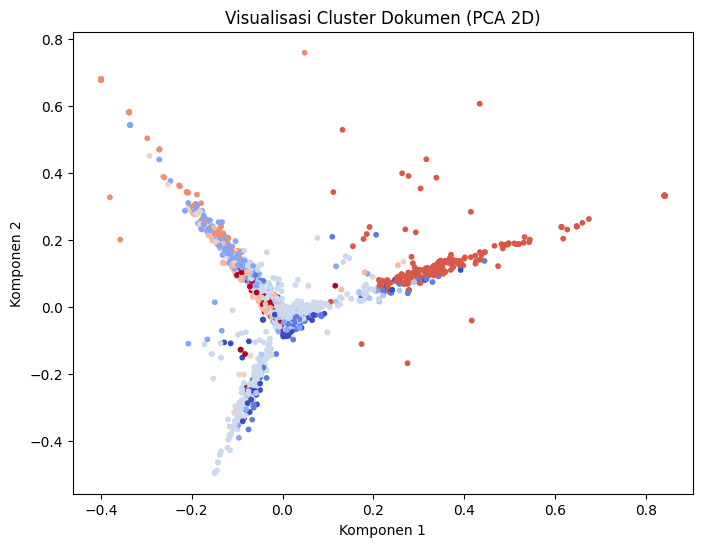

In [8]:
pca = PCA(n_components=10, random_state=42)
reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=df['cluster'], cmap='coolwarm', s=10)
plt.title('Visualisasi Cluster Dokumen (PCA 2D)')
plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')
plt.show()

## 🧩 Interpretasi Hasil
- Jika kita lihat kata-kata dominan di tiap cluster, biasanya:
  - Cluster 0 → banyak kata seperti *free, win, claim, call now* → **spam**
  - Cluster 1 → banyak kata seperti *ok, sorry, today, love* → **pesan biasa**

Jadi, meskipun dataset tidak punya label, algoritma clustering dapat menemukan dua kelompok alami yang mewakili email spam dan email normal.